In [1]:
from Preprocessing_Module import read_data, add_topological, add_landcover, merge_new_data, fill_data, select_columns, reshape_dataset, fillna_dataset, remove_nan_features, unused_stations
from Feature_Expansion_Module import feature_expansion
from Initializer_Module import initializer
from XGboost_Model_Module import Xgboost_model
from Neural_Network_Module import FeedforwardNeuralNetModel
from Model_Validation_Module import give_predictions_nn, evaluate_nn, give_predictions_xgboost, evaluate_xgboost, validate_results, merge_predictions
import numpy as np
import pandas as pd
import datetime

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2022.csv')
data = merge_new_data('../Datasets/Greece/2023/GRE_culex_ento_09_2023_processed.csv', data)
data.to_csv('../Datasets/Greece/GRE_culex_2011_2023.csv', index=False)
# =====================================================================
data = data[(data.nuts2_name == 'CENTRAL MACEDONIA') | (data.nuts2_name == 'Π. ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ')] 
data = data.reset_index(drop=True)
# #=====================================================================
columns = ['dt_placement', 'x', 'y', 'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece__2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece__2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the date of prediction for the test set
date = '2023-10-01'

# set the filename for export
case = 'Culex_Greece_CM_'

# set the filename to export
path = './predictions2/Greece/Central_Macedonia/'

# title = date[:-3].replace(date[:-3][-1],str(int(date[:-3][-1])+1)).replace('-','_')
title = date[:-3].replace('-','_')
title = case + title

# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'

In [5]:
data = feature_expansion(data)

In [6]:
data = initializer(data, model_type, [0., 5., 14., 27., 48., 81., 139., 232., 395., 740.2, 10458.])

Bounds: [    0.      5.     14.     27.     48.     81.    139.    232.    395.
   740.2 10458. ]


#===========================================
Predictions without entomological features
#===========================================



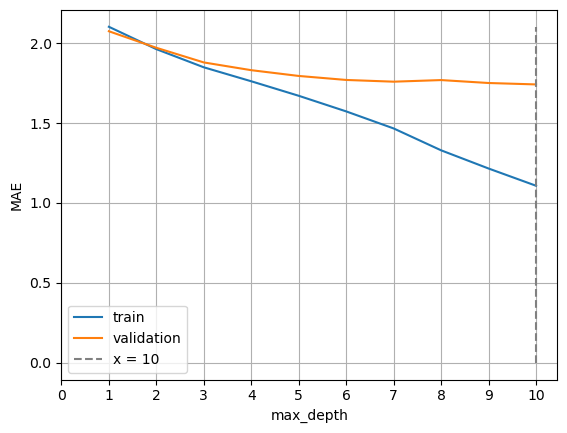

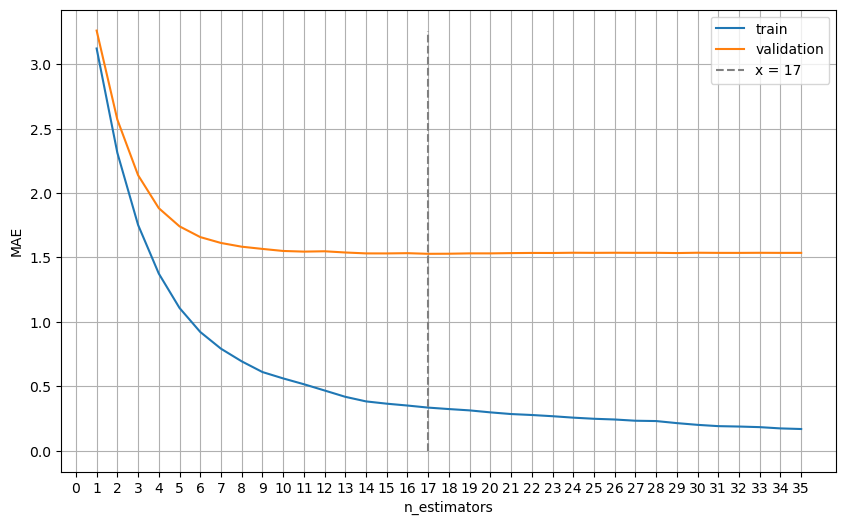

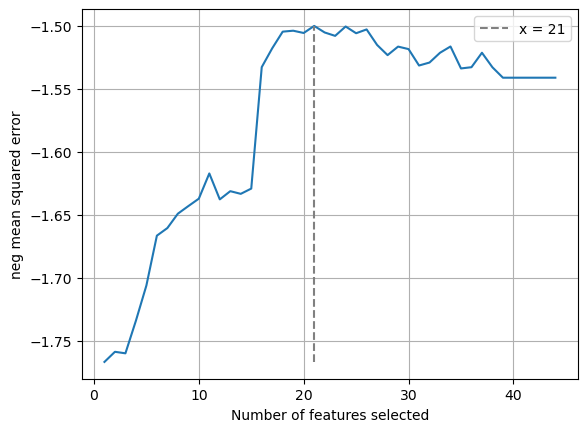

max_depth:  10
Number of estimators:  17
Selected_features:  Index(['lst_mar_day_mean', 'lst_apr_day_mean', 'lst_jan_night_mean',
       'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean',
       'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER', 'SLOPE_mean_1km',
       'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'HILLSHADE_mean_1km',
       'FS_AREA_1km', 'FLOW_ACCU_200m', 'landcover', 'null_island_distance',
       'days_distance', 'mo_cos', 'lst', 'summer_days_year',
       'summer_days_month'],
      dtype='object')
MAE on train set:  0.4733967582804792
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.4732394366197183
Error <= 3: 93.45 %
min prediction: -0.0
max prediction: 9.0


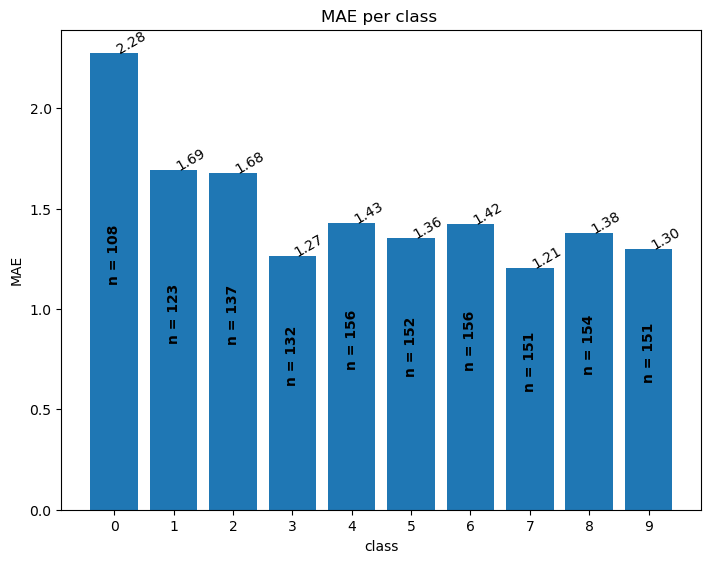

-----------|class error-MAE| difference-----------
mean: 0.227160168865531
std: 0.2820437704242721
coefficient of variation (std/mean): 1.2416075046643842

----------normalized difference-------------
mean: 0.23185179833890848
std: 0.2878689327875222


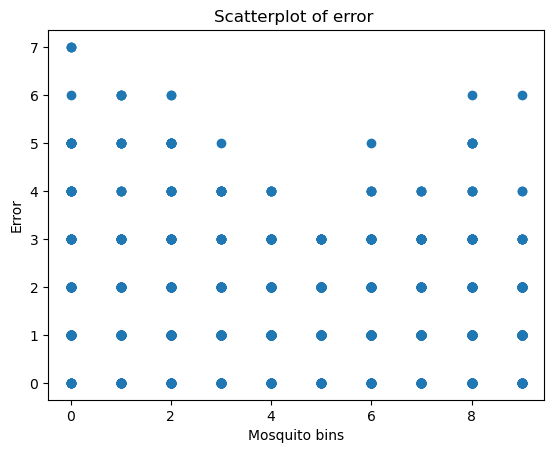

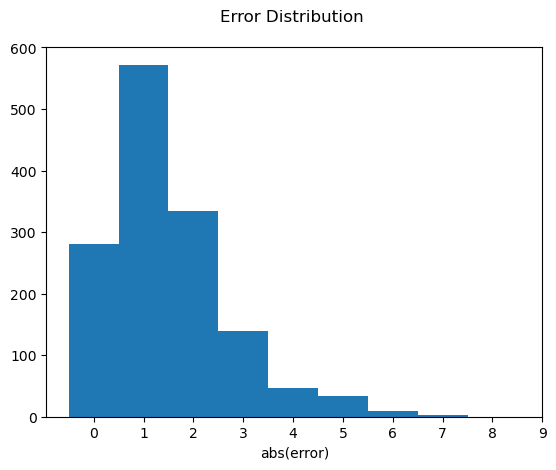

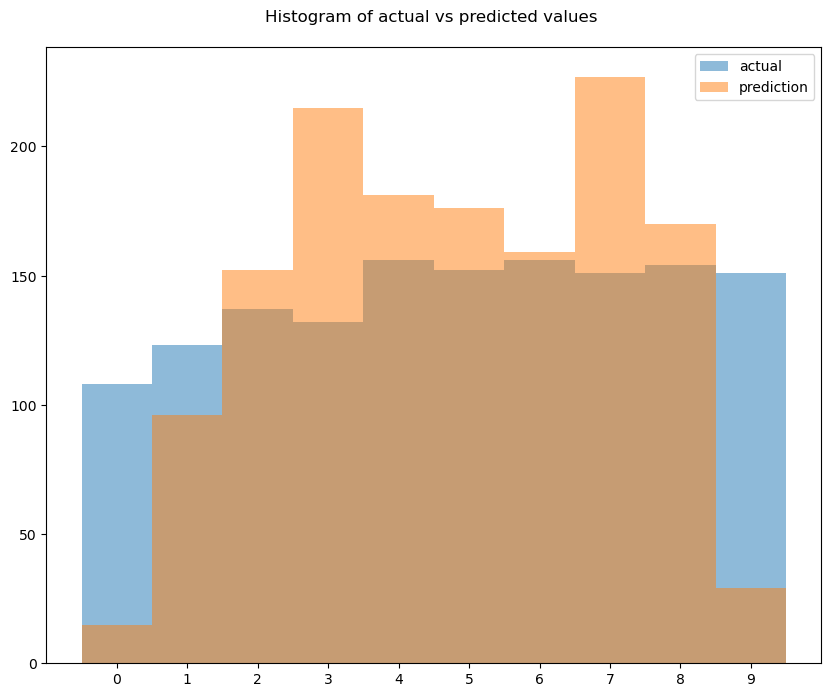

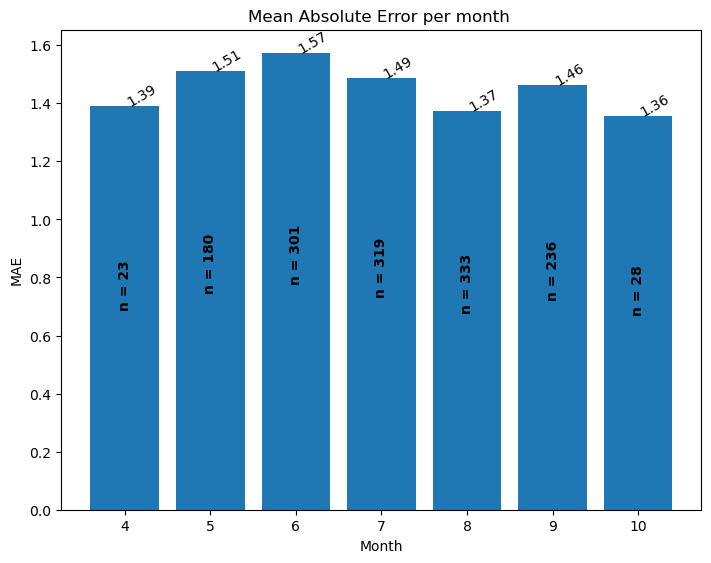

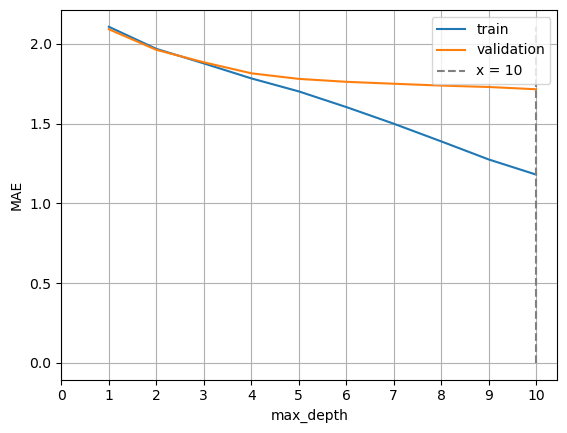

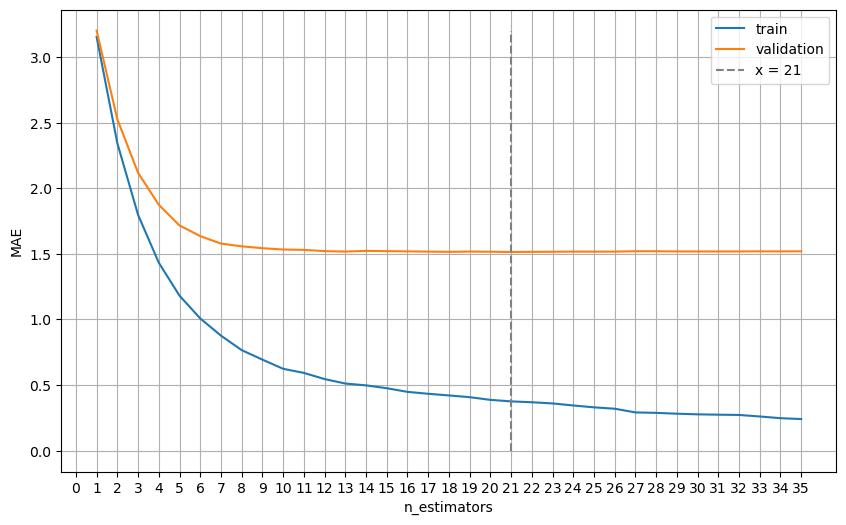

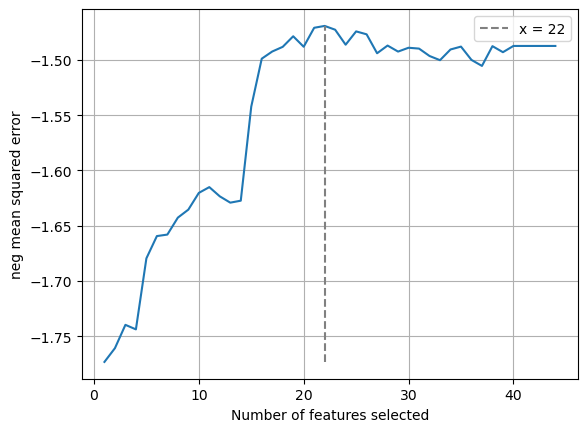

max_depth:  10
Number of estimators:  21
Selected_features:  Index(['lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean',
       'lst_apr_day_mean', 'lst_jan_night_mean', 'lst_feb_night_mean',
       'lst_mar_night_mean', 'lst_apr_night_mean', 'DISTANCE_TO_COAST',
       'DISTANCE_TO_RIVER', 'SLOPE_mean_1km', 'ASPECT_mean_200m',
       'ELEVATION_mean_1km', 'HILLSHADE_mean_1km', 'FLOW_ACCU_200m',
       'landcover', 'null_island_distance', 'days_distance', 'mo_cos', 'lst',
       'summer_days_year', 'summer_days_month'],
      dtype='object')
0.0     202
1.0     451
2.0     716
3.0    1190
4.0    1678
5.0     489
6.0      43
Name: prediction, dtype: int64

Low risk category stations: 653
Medium risk category stations: 4073
High risk category stations: 43


In [7]:
#=====================================================================
# Automation models without or with/without entomological data
#=====================================================================

# Spit to train and test based on date of predictions
test = data.loc[data[date_col] >= pd.to_datetime(date)]
data = data.loc[data[date_col] < pd.to_datetime(date)]

# Delete from test set stations that are not used during the last 3 years
# test = unused_stations(data, test, period=3)

# Remove features that are more 40% filled with nan values in the test set
data, test = remove_nan_features(data, test, 0.3)

# set the only_env as True if there are no mosquitoes for the forecast month
only_env=None    
if len(test.dropna(subset=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks','previous_mosq_measure']).drop(columns=['mosq_now']).dropna())>0:
    only_env=False
elif len(test.drop(columns=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks', 'previous_mosq_measure', 'mosq_now']).dropna())>0:
    only_env=True
else:
    print('No data left for prediction')
    

learning_rate = 0.3
# set the early stop argument as early_stop = (tolerance, min_delta)
early_stop = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the boolean for plotting feature importance (!very time consuming!)
fi = False

print(only_env)
    
if only_env != None:
    # Run first without entomological features
    print("#===========================================")
    print("Predictions without entomological features")
    print("#===========================================")
    print()
    data_env = data.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    test_env = test.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    
    data_env = data_env.dropna().reset_index(drop=True)
    test_env = test_env.dropna(subset=test_env.columns.difference(['mosq_now'])).reset_index(drop=True)

    model = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                          embedding_data = embedded_data,  transformation_list = transformation_list,
                          early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)
    
    evaluate_xgboost(model, data_env, fi = fi)

    predictions_env = give_predictions_xgboost(model, data_env, test_env, env = True, filepath = path, case = title,
                                               fi = fi, export = only_env)


    # Run with entomological features if at least one station has mosquitos number
    if not only_env:
        print("#===========================================")
        print("Predictions with entomological features")
        print("#===========================================")
        print()
        
        data_entom = data.dropna().reset_index(drop=True)
        test_entom = test.dropna(subset=test.columns.difference(['mosq_now'])).reset_index(drop=True)
        
        model = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                              embedding_data = embedded_data,  transformation_list = transformation_list,
                              early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)
    
        evaluate_xgboost(model, data_entom, fi = fi)

        predictions_entom = give_predictions_xgboost(model, data_entom, test_entom, env = True, filepath = path,
                                                     fi = fi, case = title, export = only_env)

        print("#===========================================")
        print("Predictions with/without entomological features")
        print("#===========================================")
        merge_predictions(predictions_env,predictions_entom, path, title, export=True)

In [18]:
learning_rate = 0.3
# set the early stop argument as early_stop = (tolerance, min_delta)
early_stop = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the boolean for plotting feature importance (!very time consuming!)
fi = False

only_env = True
fi = False

model = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                          embedding_data = embedded_data,  transformation_list = transformation_list,
                          early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)
model.features = ['acc_rainfall_jan', 'lst_jan_day_mean', 'lst_feb_day_mean',
       'lst_mar_day_mean', 'lst_apr_day_mean', 'lst_jan_night_mean',
       'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean',
       'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER', 'SLOPE_mean_1km',
       'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'HILLSHADE_mean_1km',
       'FLOW_ACCU_200m', 'landcover', 'null_island_distance', 'days_distance',
       'mo_cos', 'lst', 'summer_days_year', 'summer_days_month']

model.depth=10
model.estimators = 22

years = data['dt_placement'].dt.year.unique().tolist()
years.sort()
years = [e for e in years if e>=2018 and e<2023]
for i in years:
    date = str(i) +'-9-01'
    
    title = date[:-3].replace('-','_')
    title = case + title

    test = data.loc[data[date_col] >= pd.to_datetime(date)]
    test_env = test.loc[test[date_col] < pd.to_datetime(date)+datetime.timedelta(days=30)]
    data_env = data.loc[data[date_col] < pd.to_datetime(date)]
    
    data_env = data_env.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    test_env = test_env.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)

    data_env = data_env.dropna().reset_index(drop=True)
    test_env = test_env.dropna(subset=test_env.columns.difference(['mosq_now'])).reset_index(drop=True)


    predictions_env = give_predictions_xgboost(model, data_env, test_env, env = True, filepath = path, case = title,
                                               fi = fi, export = only_env)

prediction
-0.0     2
 1.0    11
 2.0    15
 3.0    16
 4.0    10
 5.0    10
 6.0     2
 7.0     1
 8.0     1
Name: count, dtype: int64

Low risk category stations: 13
Medium risk category stations: 51
High risk category stations: 4
prediction
0.0     1
1.0    12
2.0     9
3.0    12
4.0     7
5.0     3
6.0    13
7.0     5
8.0     3
Name: count, dtype: int64

Low risk category stations: 13
Medium risk category stations: 31
High risk category stations: 21
prediction
-0.0     2
 1.0     7
 2.0    10
 3.0    14
 4.0    15
 5.0    13
 6.0    11
 7.0     5
 8.0     1
Name: count, dtype: int64

Low risk category stations: 9
Medium risk category stations: 52
High risk category stations: 17
prediction
0.0     8
1.0    12
2.0    27
3.0    12
4.0     8
5.0    10
6.0     4
7.0     3
Name: count, dtype: int64

Low risk category stations: 20
Medium risk category stations: 57
High risk category stations: 7


ValueError: Per-column arrays must each be 1-dimensional

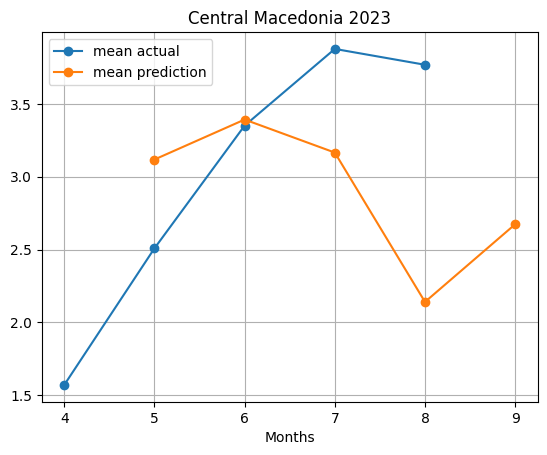

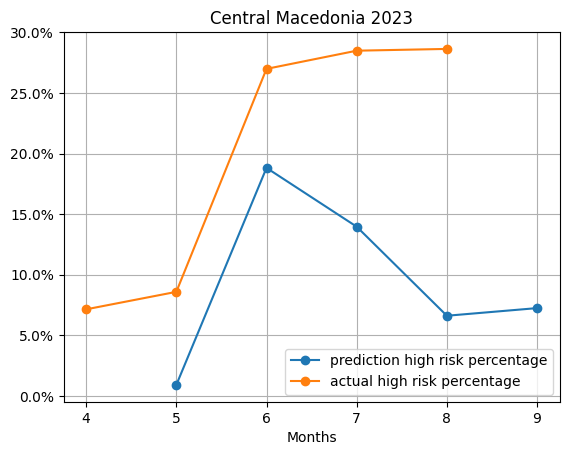

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


mean_prediction = []
median_prediction = []
mean_actual = []
median_actual = []
pred_months = []
actual_months = []
high_risk_cells_pred = []
high_risk_cells_actual = []
for i in range(5,10):
    pred_months.append(i)
    data1 = pd.read_csv('./predictions/Greece/Central_Macedonia/Culex_Greece_CM_2023_'+str(i)+'.csv')
    mean_prediction.append(data1['prediction'].mean())
    median_prediction.append(data1['prediction'].median())
    high_risk_cells_pred.append((((data1['prediction']>=6).sum())/len(data1))*100)
    
data1 = data[data['dt_placement']>pd.to_datetime('2023-01-01')]
data1['dt_placement'] = data1['dt_placement'] + datetime.timedelta(days=15)
mon = data1.dt_placement.dt.month.unique().tolist()
mon.sort()
for i in mon:
    actual_months.append(i)
    data2 = data1[data1['dt_placement'].dt.month==i]
    mean_actual.append(data2['mosq_now'].mean())
    median_actual.append(data2['mosq_now'].median())
    high_risk_cells_actual.append((((data2['mosq_now']>=6).sum())/len(data2))*100)
    
    
plt.figure()
plt.plot(actual_months,mean_actual,'-o', label='mean actual')
# plt.plot(actual_months,median_actual, '-o', label='median actual')
plt.plot(pred_months,mean_prediction, '-o', label='mean prediction')
# plt.plot(pred_months,median_prediction, '-o', label='median prediction')
plt.xlabel('Months')
plt.title('Central Macedonia 2023')
plt.grid()
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(pred_months,high_risk_cells_pred, '-o', label='prediction high risk percentage')
plt.plot(actual_months,high_risk_cells_actual,'-o', label='actual high risk percentage')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Months')
plt.title('Central Macedonia 2023')
plt.grid()
plt.legend()
plt.show()

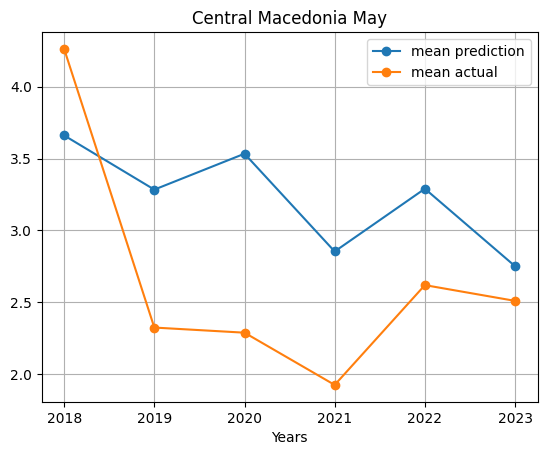

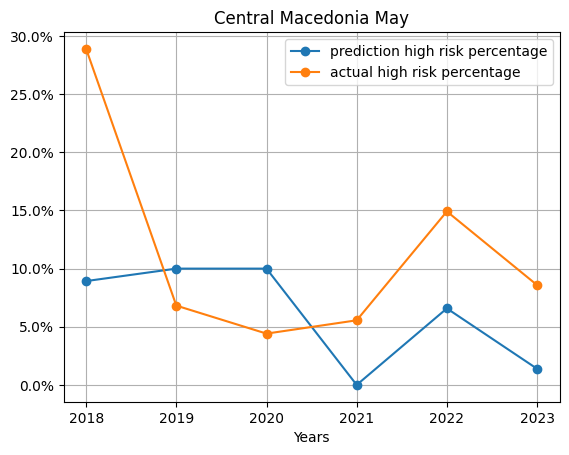

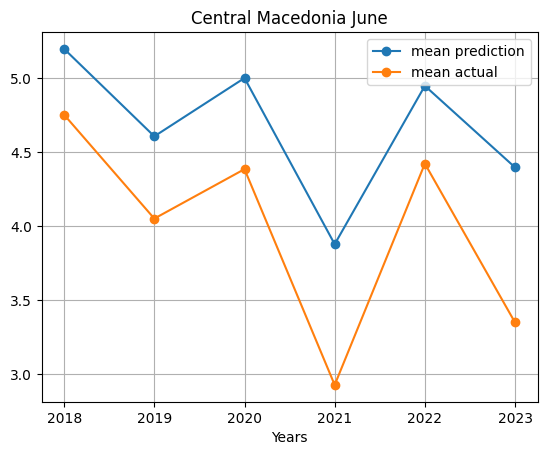

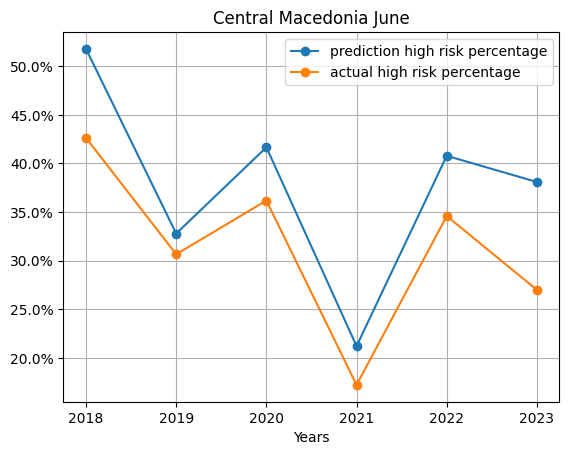

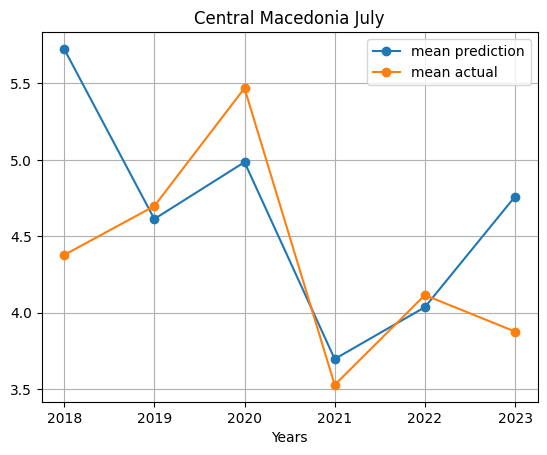

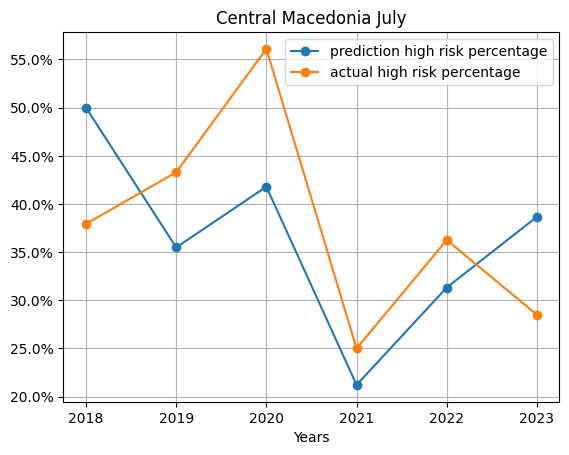

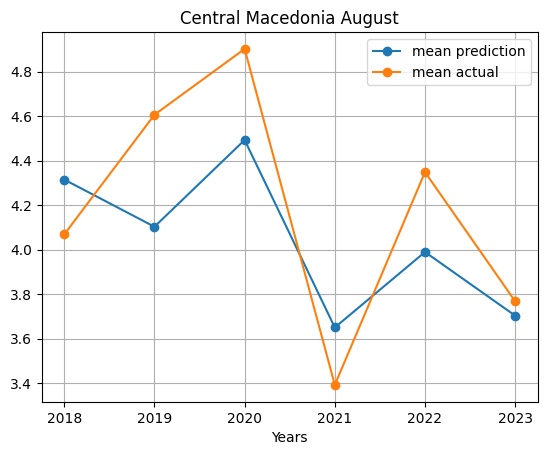

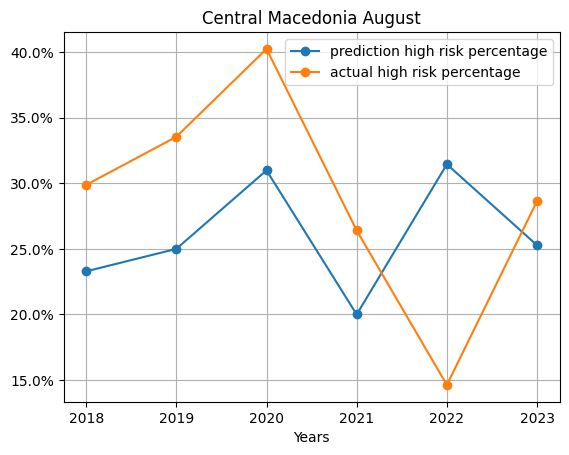

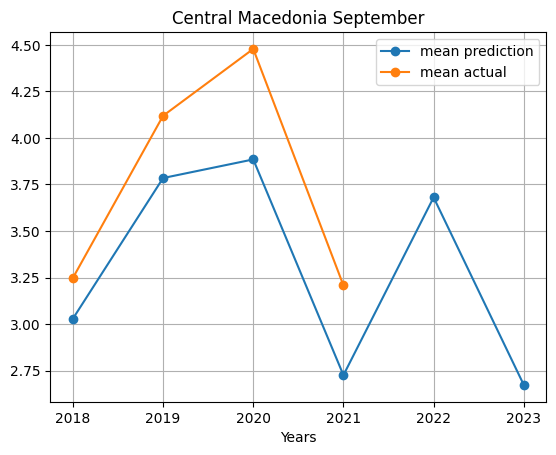

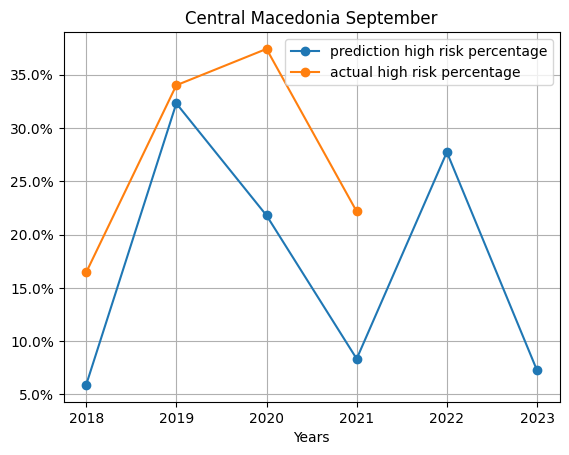

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.neighbors import BallTree

data2 = data.copy()
data2['dt_placement'] = data2['dt_placement'] + datetime.timedelta(days=15)
years = data2['dt_placement'].dt.year.unique().tolist()
months = [5, 6, 7, 8]
months_name = ['May', 'June','July','August']
years.sort()
years = [e for e in years if e>=2018 and e<=2023]
for i in months:
    actual_months = []
    pred_months = []
    mean_prediction = []
    mean_actual = []
    median_prediction = []
    median_actual = []
    high_risk_cells_pred = []
    high_risk_cells_actual = []
    for j in years:
        data3 = data2[data2['dt_placement'].dt.year==j]
        data3 = data3[data3['dt_placement'].dt.month==i]
        actual_months.append(str(j))
        mean_actual.append(data3['mosq_now'].mean())
        median_actual.append(data3['mosq_now'].median())
        high_risk_cells_actual.append((((data3['mosq_now']>=6).sum())/len(data3))*100)

        corr = data3[['x','y']]
        corr['x_rad'] = corr['x'].apply(lambda x: np.deg2rad(x))
        corr['y_rad'] = corr['y'].apply(lambda x: np.deg2rad(x))

        pred_months.append(str(j))
        data1 = pd.read_csv('./predictions/Greece/Central_Macedonia/Culex_Greece_CM_'+ str(j)+ '_' +str(i)+'.csv')
        data1['x_rad'] = data1['x'].apply(lambda x: np.deg2rad(x))
        data1['y_rad'] = data1['y'].apply(lambda x: np.deg2rad(x))
        ball = BallTree(data1[["y_rad", "x_rad"]].values, metric='haversine')
        _, indices = ball.query(corr[["y_rad", "x_rad"]].values, k = 1)
        indices = np.unique([e[0] for e in indices.tolist()]).tolist()
        data1 = data1.iloc[indices,:]
        mean_prediction.append(data1['prediction'].mean())
        median_prediction.append(data1['prediction'].median())
        high_risk_cells_pred.append((((data1['prediction']>=6).sum())/len(data1))*100)


    plt.figure()
    plt.plot(pred_months,mean_prediction,'-o', label='mean prediction')
    # plt.plot(pred_months,median_prediction,'-o', label='median prediction')
    plt.plot(actual_months,mean_actual,'-o', label='mean actual')
    # plt.plot(actual_months,median_actual,'-o', label='median actual')
    plt.xlabel('Years')
    plt.title('Central Macedonia '+ months_name[months.index(i)])
    plt.grid()
    plt.legend()
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.plot(pred_months,high_risk_cells_pred,'-o', label='prediction high risk percentage')
    plt.plot(actual_months,high_risk_cells_actual,'-o', label='actual high risk percentage')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xlabel('Years')
    plt.title('Central Macedonia '+ months_name[months.index(i)])
    plt.grid()
    plt.legend()
    plt.show()
    
    print('==========================================================================================================')
    
actual_months = []
pred_months = []
mean_prediction = []
mean_actual = []
median_prediction = []
median_actual = []
high_risk_cells_pred = []
high_risk_cells_actual = []
for j in years:
    data3 = data2[data2['dt_placement'].dt.year==j]
    data3 = data3[data3['dt_placement'].dt.month==i+1]
    actual_months.append(str(j))
    mean_actual.append(data3['mosq_now'].mean())
    median_actual.append(data3['mosq_now'].median())
    high_risk_cells_actual.append((((data3['mosq_now']>=6).sum())/len(data3))*100)


    pred_months.append(str(j))
    data1 = pd.read_csv('./predictions/Greece/Central_Macedonia/Culex_Greece_CM_'+ str(j)+ '_' +str(i+1)+'.csv')
    mean_prediction.append(data1['prediction'].mean())
    median_prediction.append(data1['prediction'].median())
    high_risk_cells_pred.append((((data1['prediction']>=6).sum())/len(data1))*100)


plt.figure()
plt.plot(pred_months,mean_prediction,'-o', label='mean prediction')
# plt.plot(pred_months,median_prediction,'-o', label='median prediction')
plt.plot(actual_months,mean_actual,'-o', label='mean actual')
# plt.plot(actual_months,median_actual,'-o', label='median actual')
plt.xlabel('Years')
plt.title('Central Macedonia '+ 'September')
plt.grid()
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(pred_months,high_risk_cells_pred,'-o', label='prediction high risk percentage')
plt.plot(actual_months,high_risk_cells_actual,'-o', label='actual high risk percentage')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Years')
plt.title('Central Macedonia '+ 'September')
plt.grid()
plt.legend()
plt.show()